In [1]:
# Code generated from tutorial by Mark Jay: https://www.youtube.com/watch?v=fSM6cdFQdwI&t=436s

import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

In [5]:
'''options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
}'''
''''gpu': 1.0''' 

options = {
    'model': 'cfg/tiny-yolo-4c.cfg',
    'load': 5250,
    'threshold': 0.2,
    'labels': 'labelsNightAndSnow4C.txt'
}

'''  'labels': 'labelsMATLABannotations.txt'  '''
tfnet = TFNet(options)

Parsing cfg/tiny-yolo-4c.cfg
Loading None ...
Finished in 0.0004951953887939453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13,

In [6]:
img = cv2.imread('Nighttime_Aug21_Overcast_21C_537.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(img)

img.shape
results

[{'label': 'PDU',
  'confidence': 0.84521645,
  'topleft': {'x': 472, 'y': 197},
  'bottomright': {'x': 480, 'y': 224}},
 {'label': 'PDU',
  'confidence': 0.5309379,
  'topleft': {'x': 703, 'y': 204},
  'bottomright': {'x': 721, 'y': 252}},
 {'label': 'PDU',
  'confidence': 0.6664868,
  'topleft': {'x': 680, 'y': 190},
  'bottomright': {'x': 706, 'y': 262}},
 {'label': 'CRO',
  'confidence': 0.4283314,
  'topleft': {'x': 537, 'y': 179},
  'bottomright': {'x': 619, 'y': 267}},
 {'label': 'BIK',
  'confidence': 0.45594957,
  'topleft': {'x': 708, 'y': 247},
  'bottomright': {'x': 819, 'y': 425}}]

"\ntopleft = (result[0]['topleft']['x'], result[0]['topleft']['y'])\nbottomright = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])\nlabel = result[0]['label']\nconfidence = result[0]['confidence']\n\nimg = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) \ncomment this last thing is colour and line width\nimg = cv2.putText(img, str(confidence), bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)\ncomment this last thing is font size and color and line width\n\nplt.imshow(img)\nplt.show\n"

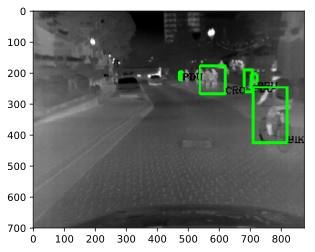

In [7]:
colors = [tuple(255 * np.random.rand(3)) for i in range(100)]
for color, result in zip(colors, results):
    
    topleft = (result['topleft']['x'], result['topleft']['y'])
    bottomright = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    img = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) 
    img = cv2.putText(img, label, bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)


plt.imshow(img)
plt.show

'''
topleft = (result[0]['topleft']['x'], result[0]['topleft']['y'])
bottomright = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']
confidence = result[0]['confidence']

img = cv2.rectangle(img, topleft, bottomright, (0, 255, 0), 7) 
comment this last thing is colour and line width
img = cv2.putText(img, str(confidence), bottomright, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
comment this last thing is font size and color and line width

plt.imshow(img)
plt.show
'''